In [2]:
import pandas as pd
import cdt
import pickle
import networkx as nx
import matplotlib.pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [7]:
# read data
df = pd.read_csv('../../data/session-df-ak.csv')
cols = ['skip', 'hour_of_day', 'session_position']
df = df[cols]
#df = pickle.load( open( "../../data/df_causal_discovery.p", "rb") )

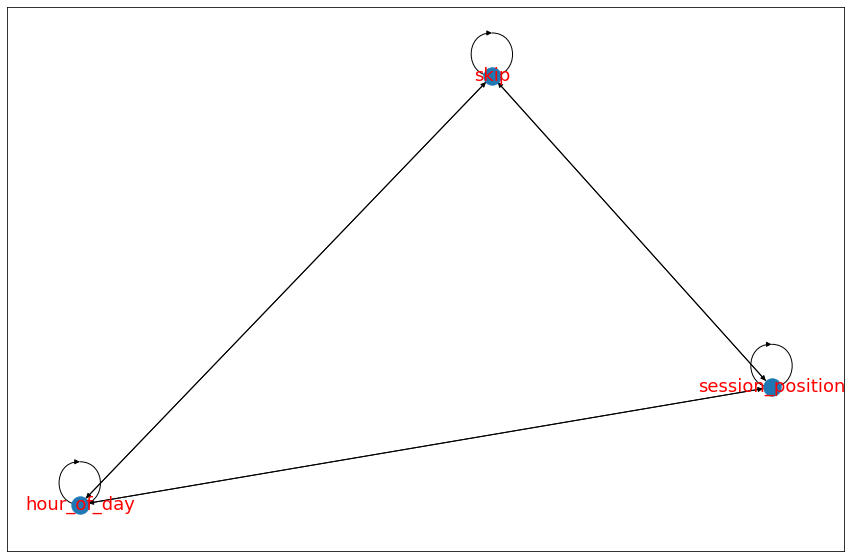

In [8]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to data
skeleton = glasso.predict(df)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

PC is ran on the skeleton of the given graph.


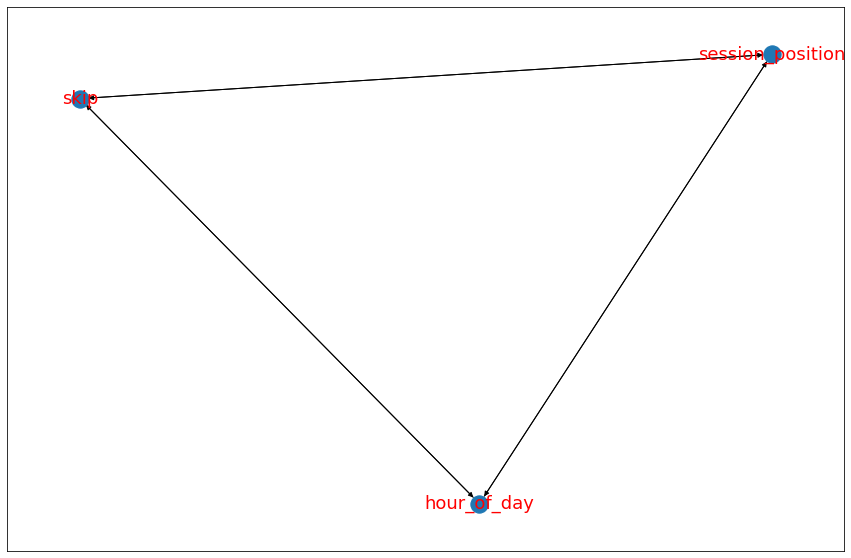

In [9]:
# Use causal discovery to get causal models# PC algorithm
model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')